<a href="https://colab.research.google.com/github/Jezreel114/CCMACLRL_EXERCISES_COM222ML-/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

1. Display the summary of all the features of the dataset using `.info()`

In [180]:
# Converts csv to dataframe
df = pd.read_excel('./personality.xlsx')

In [181]:
# put your answer here
df.head()

,Name,\nPost/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,Hallasgo,0,0,0,572,0
1,Cruspero,1,1,1,830,1
2,Saralde,0,0,0,243,0
3,Racho,1,1,1,833,1
4,Camarite,1,0,0,274,0


In [182]:
# put your answer here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name                         50 non-null     object
 1   
Post/Share Frequently?      50 non-null     int64 
 2   Active in social media?      50 non-null     int64 
 3   Replies to comments?         50 non-null     int64 
 4   Number of friends/followers  50 non-null     int64 
 5   Personality                  50 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.5+ KB


In [183]:
df.describe()

,\nPost/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.620000,0.560000,0.540000,616.780000,0.500000
std,0.490314,0.501427,0.503457,209.357159,0.505076
min,0.000000,0.000000,0.000000,212.000000,0.000000
25%,0.000000,0.000000,0.000000,472.250000,0.000000
50%,1.000000,1.000000,1.000000,630.000000,0.500000
75%,1.000000,1.000000,1.000000,810.750000,1.000000
max,1.000000,1.000000,1.000000,943.000000,1.000000


2. Display the total number of samples from each label using `.value_counts()`

In [184]:
df['Personality'].value_counts()

Personality
0    25
1    25
Name: count, dtype: int64

## C. Split the dataset into training and test set

3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [185]:
# put your answer here
X = df.drop(columns=['Personality']).drop(columns=['Name']).values

4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [186]:
# put your answer here
y = df['Personality'].values

5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [187]:
# put your answer here
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40, 4)
(40,)
(10, 4)
(10,)


## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

In [188]:
# put your answer here
knn = KNeighborsClassifier(n_neighbors=13)

7. Train the model using the `.fit()`

In [189]:
# put your answer here
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

8. Test the model using the `.predict()`

In [190]:
# put your answer here
y_pred = knn.predict(X_test)

## Evaluate the model

9. Create a confusion matrix

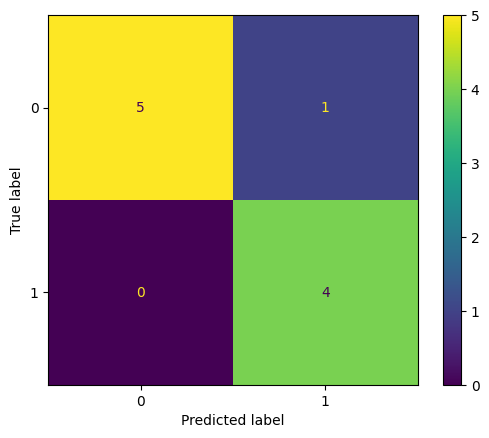

In [191]:
# put your answer here
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

10. Display the accuracy

In [192]:
# put your answer here
metrics.accuracy_score(y_test, y_pred)

0.9

11. Display the precision

In [193]:
# put your answer here
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.83333333 1.        ]


12. Display the recall

In [194]:
# put your answer here
# Calculate recall
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [1.  0.8]


13. Display the f1-score

In [195]:
# put your answer here
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.90909091 0.88888889]


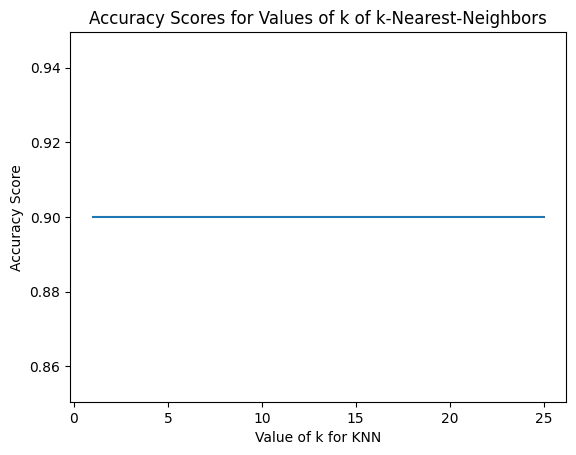

In [196]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [197]:
knn.predict([[0,1,0,1000]])

array([1], dtype=int64)